In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import PyQt5                                    # For displaying graphs in a new window (Doesn't work on Virtual Env)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/BigData/crime1-p.csv')
print('File Read Succesfully')

File Read Succesfully


In [ ]:
data['Date']=pd.to_datetime(data['Date'])



In [ ]:
data.tail()

In [ ]:
data.index= pd.DatetimeIndex(data.Date)
data.index = pd.to_datetime(data.index)

In [ ]:
data['Primary Type'] = pd.Categorical(data['Primary Type'])
data['Description'] = pd.Categorical(data['Description'])
data['Location Description'] = pd.Categorical(data['Location Description'])

In [ ]:
data['Primary Type']

Date
2004-01-01 00:01:00                         THEFT
2003-03-01 00:00:00                 OTHER OFFENSE
2004-06-20 11:00:00    OFFENSE INVOLVING CHILDREN
2004-12-30 20:00:00                         THEFT
2003-05-01 01:00:00                         THEFT
                                  ...            
2003-03-08 12:10:00                         THEFT
2003-03-12 19:00:00                         THEFT
2003-01-10 10:00:00                         THEFT
2003-03-13 00:00:00                       BATTERY
2003-03-12 20:30:00                       ASSAULT
Name: Primary Type, Length: 1048575, dtype: category
Categories (30, object): [ARSON, ASSAULT, BATTERY, BURGLARY, ..., SEX OFFENSE, STALKING, THEFT, WEAPONS VIOLATION]

In [ ]:
data.tail()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2017-09-01 00:00:00,2017-09-01 00:00:00,032XX N SPRINGFIELD AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC GROUNDS,False,False
2014-02-25 19:00:00,2014-02-25 19:00:00,011XX W ROSCOE ST,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True
2014-07-01 00:00:00,2014-07-01 00:00:00,067XX W BELMONT AVE,OFFENSE INVOLVING CHILDREN,ENDANGERING LIFE / HEALTH OF CHILD,RESIDENCE,False,True
2020-11-01 08:00:00,2020-11-01 08:00:00,062XX S KILDARE AVE,THEFT,OVER $500,APARTMENT,False,True
2020-12-09 02:32:00,2020-12-09 02:32:00,008XX N DAMEN AVE,CRIMINAL DAMAGE,TO CITY OF CHICAGO PROPERTY,STREET,False,False


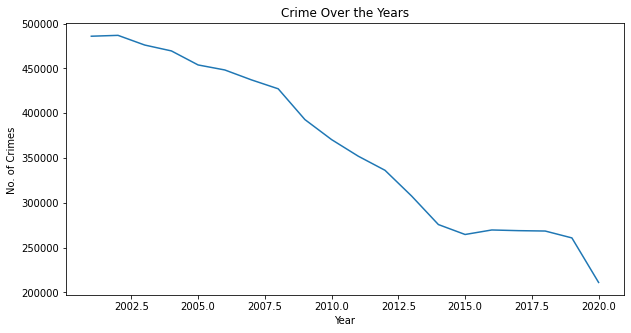

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.year]).size().plot.line()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('No. of Crimes ')
plt.show()



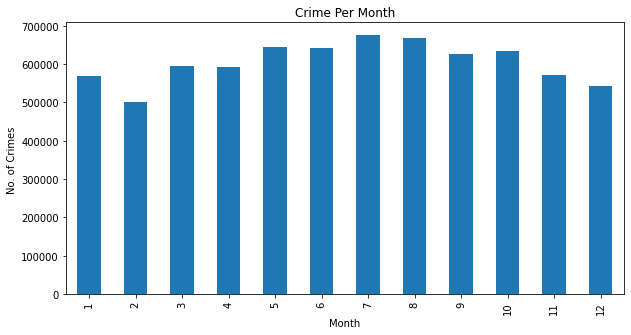

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('No. of Crimes ')
plt.show()



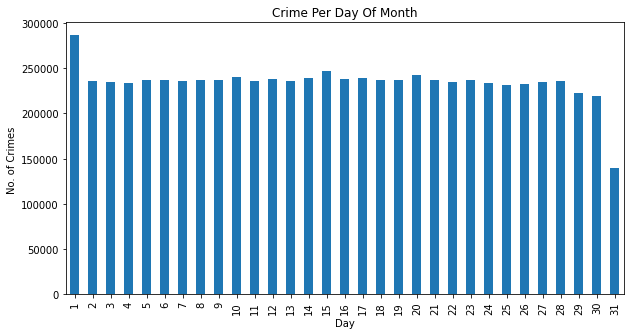

In [ ]:
plt.figure(figsize = (10,5))
data.groupby([data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('No. of Crimes ')
plt.show()


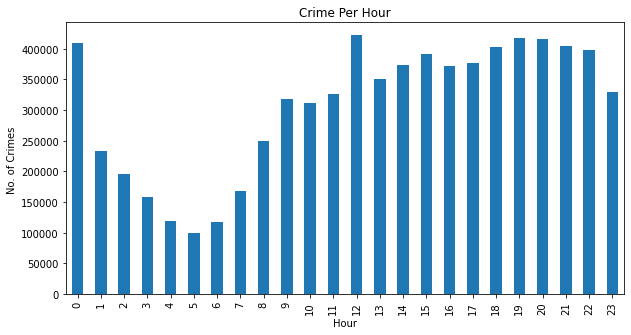

In [ ]:

plt.figure(figsize = (10,5))
data.groupby([data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('No. of Crimes ')
# %matplotlib qt                    //This command doesn't work on virtual environments like Google Colabs 
plt.show()

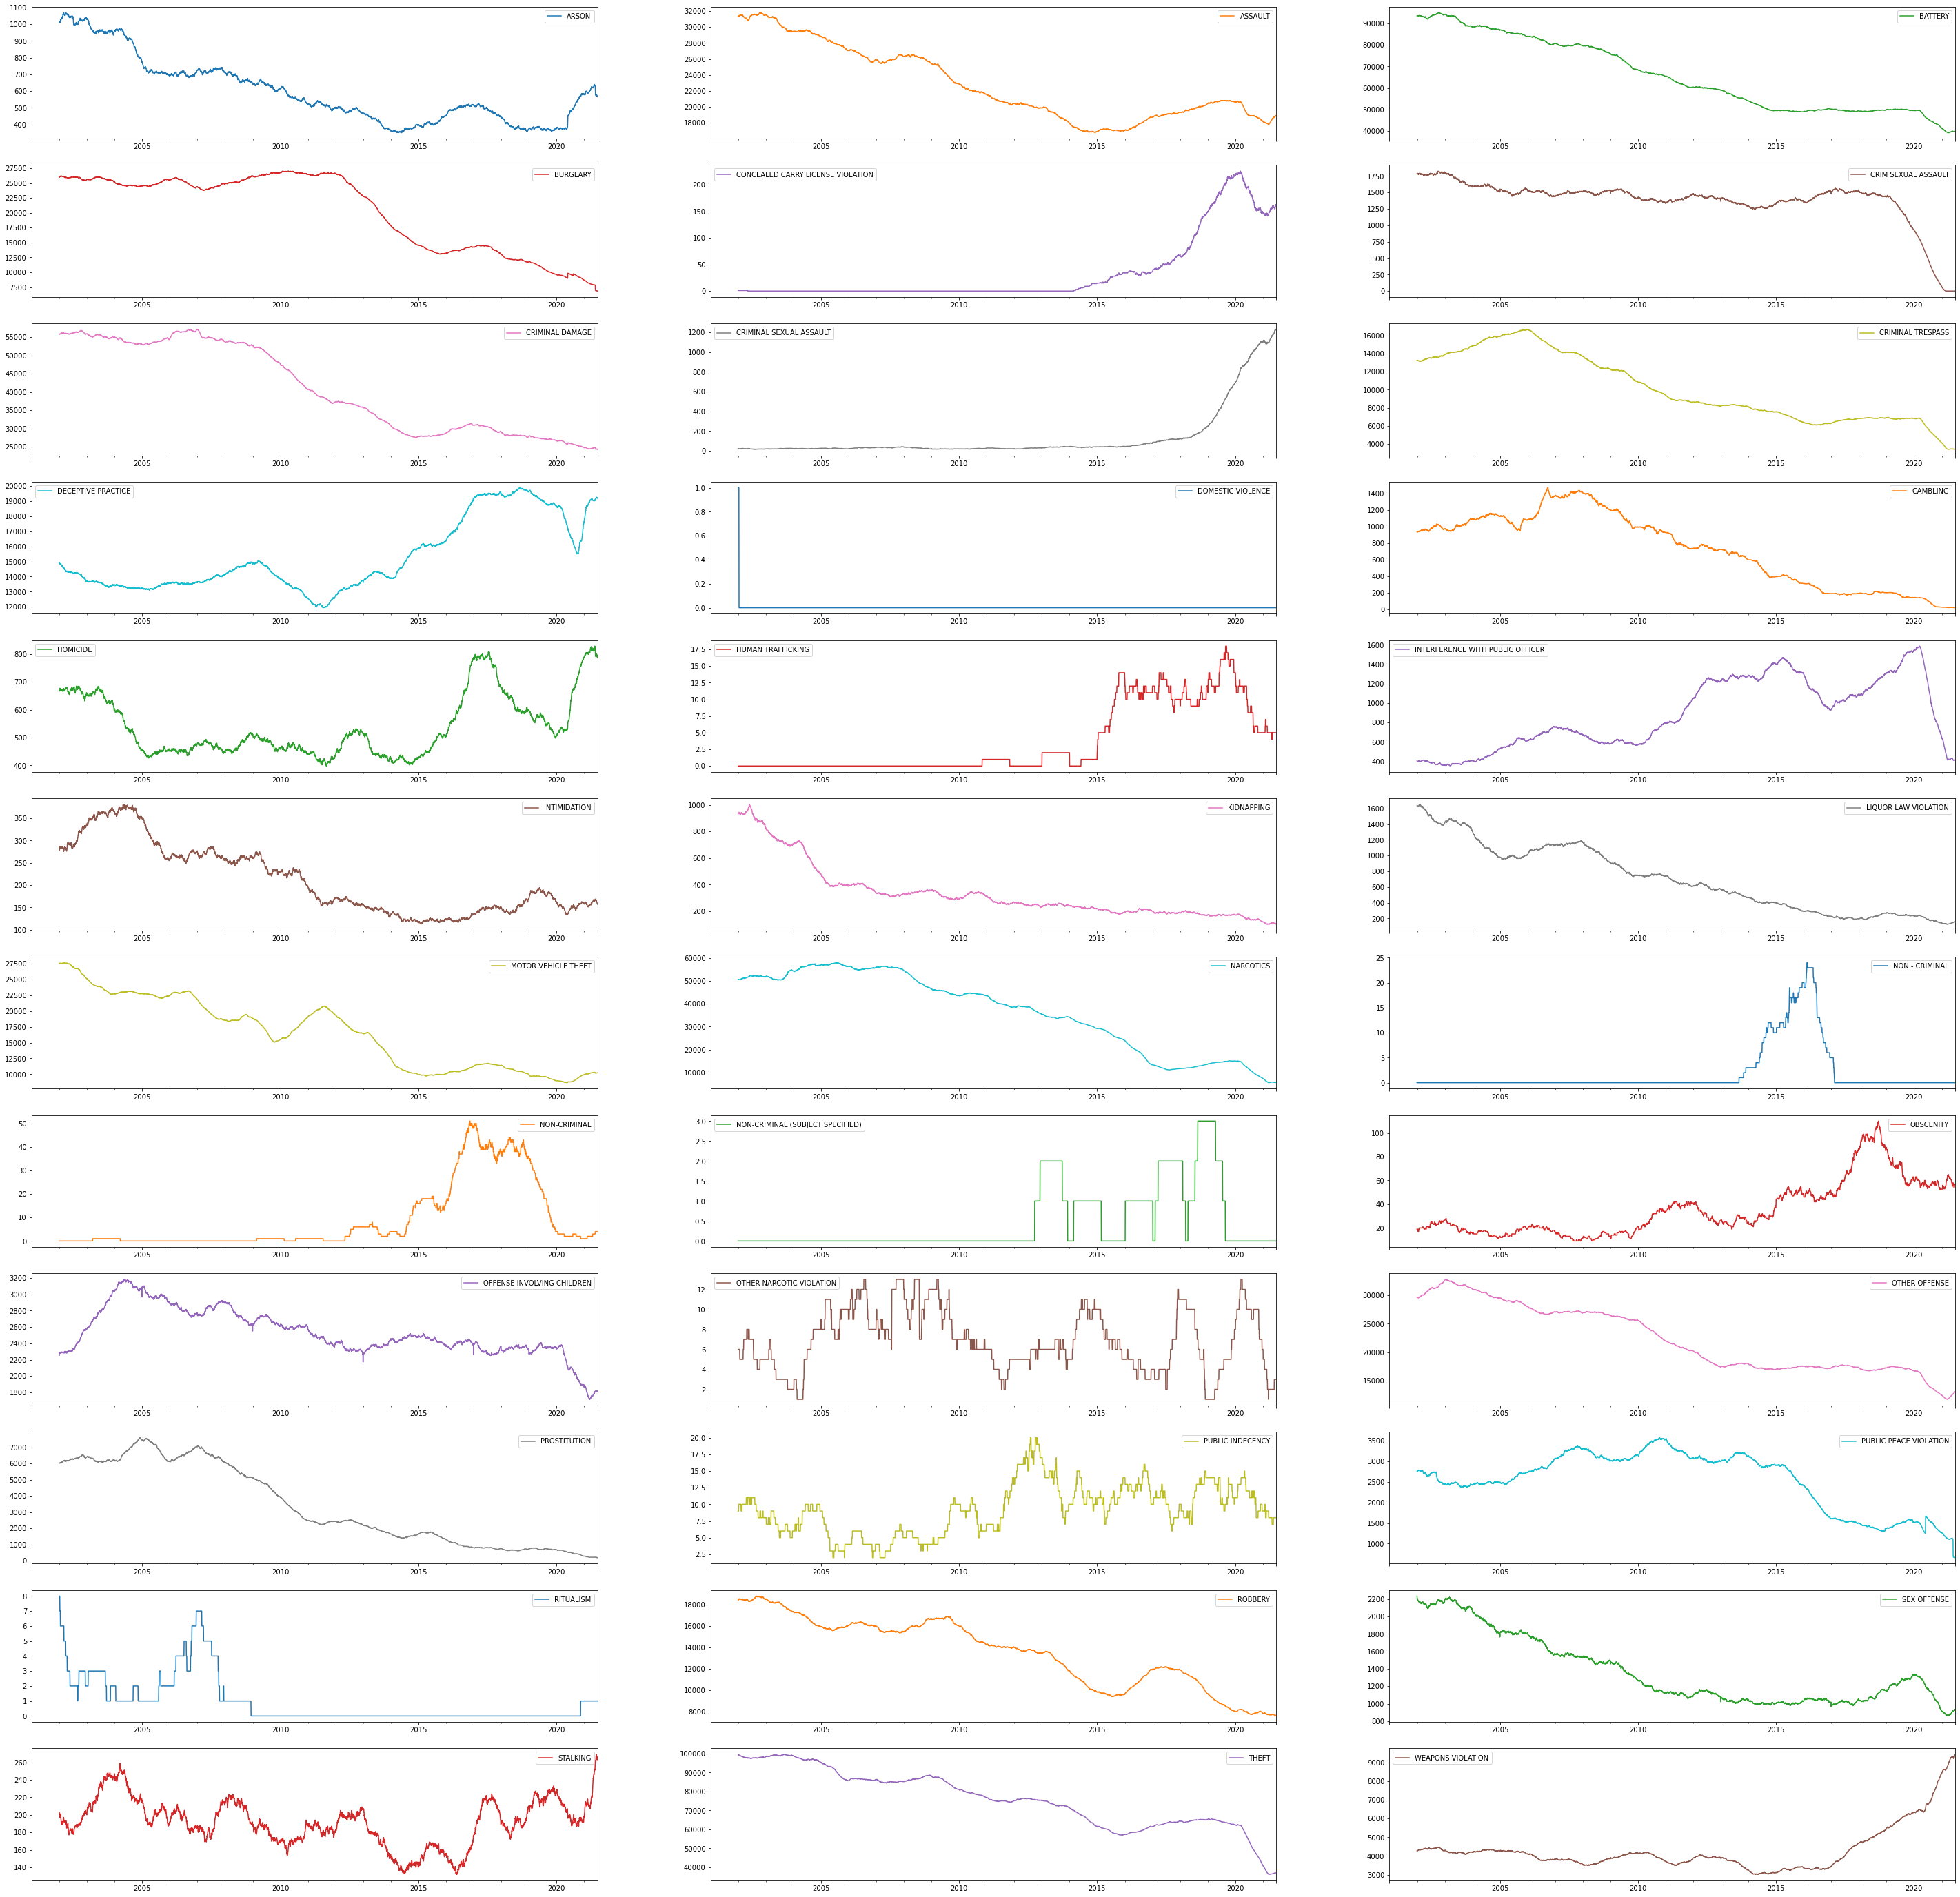

In [ ]:
crimes_count_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(50, 50), subplots=True, layout=(-1, 3), sharex=False, sharey=False)
# %matplotlib qt                    //This command doesn't work on virtual environments like Google Colabs 
